#### Files I used for ViscoAcoustic 2D Seismic modeling

- data/general/VelReady.npy
- data/general/AttnReady.npy
- data/Frio2_field/frio2_x.mat
- data/Frio2_field/frio2_x.mat
- data/Frio2_field/frio2_z.mat
- data/Frio2_field/frio2_recx.mat
- data/Frio2_field/frio2_recz.mat


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import scipy.io as sio
from scipy.interpolate import interp2d
import matplotlib
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.patches as patches

### Fig 10 in Paper

In [14]:
frio2_z = sio.loadmat('data/Frio2_field/frio2_z.mat')['z'][0]
frio2_x = sio.loadmat('data/Frio2_field/frio2_x.mat')['x'][0]
frio2_soux = 0.005
frio2_souz = 1.6572e3
frio2_recx = 30.3276
### Clean(13 receivers)
clean_frio2_recz = np.array([1678.8384, 1676.8384, 1674.8384, 1672.8384, 1670.8384, 1668.8384,
            1664.8384, 1656.8384, 1652.8384, 1648.8384, 1644.8384, 1636.8384, 1632.8384])

In [15]:
CO2_Maps = np.load('data/co2maps/co2_maps.npy')
Seismic_Gathers = np.load('data/seismic_gathers/seismic_gathers.npy')

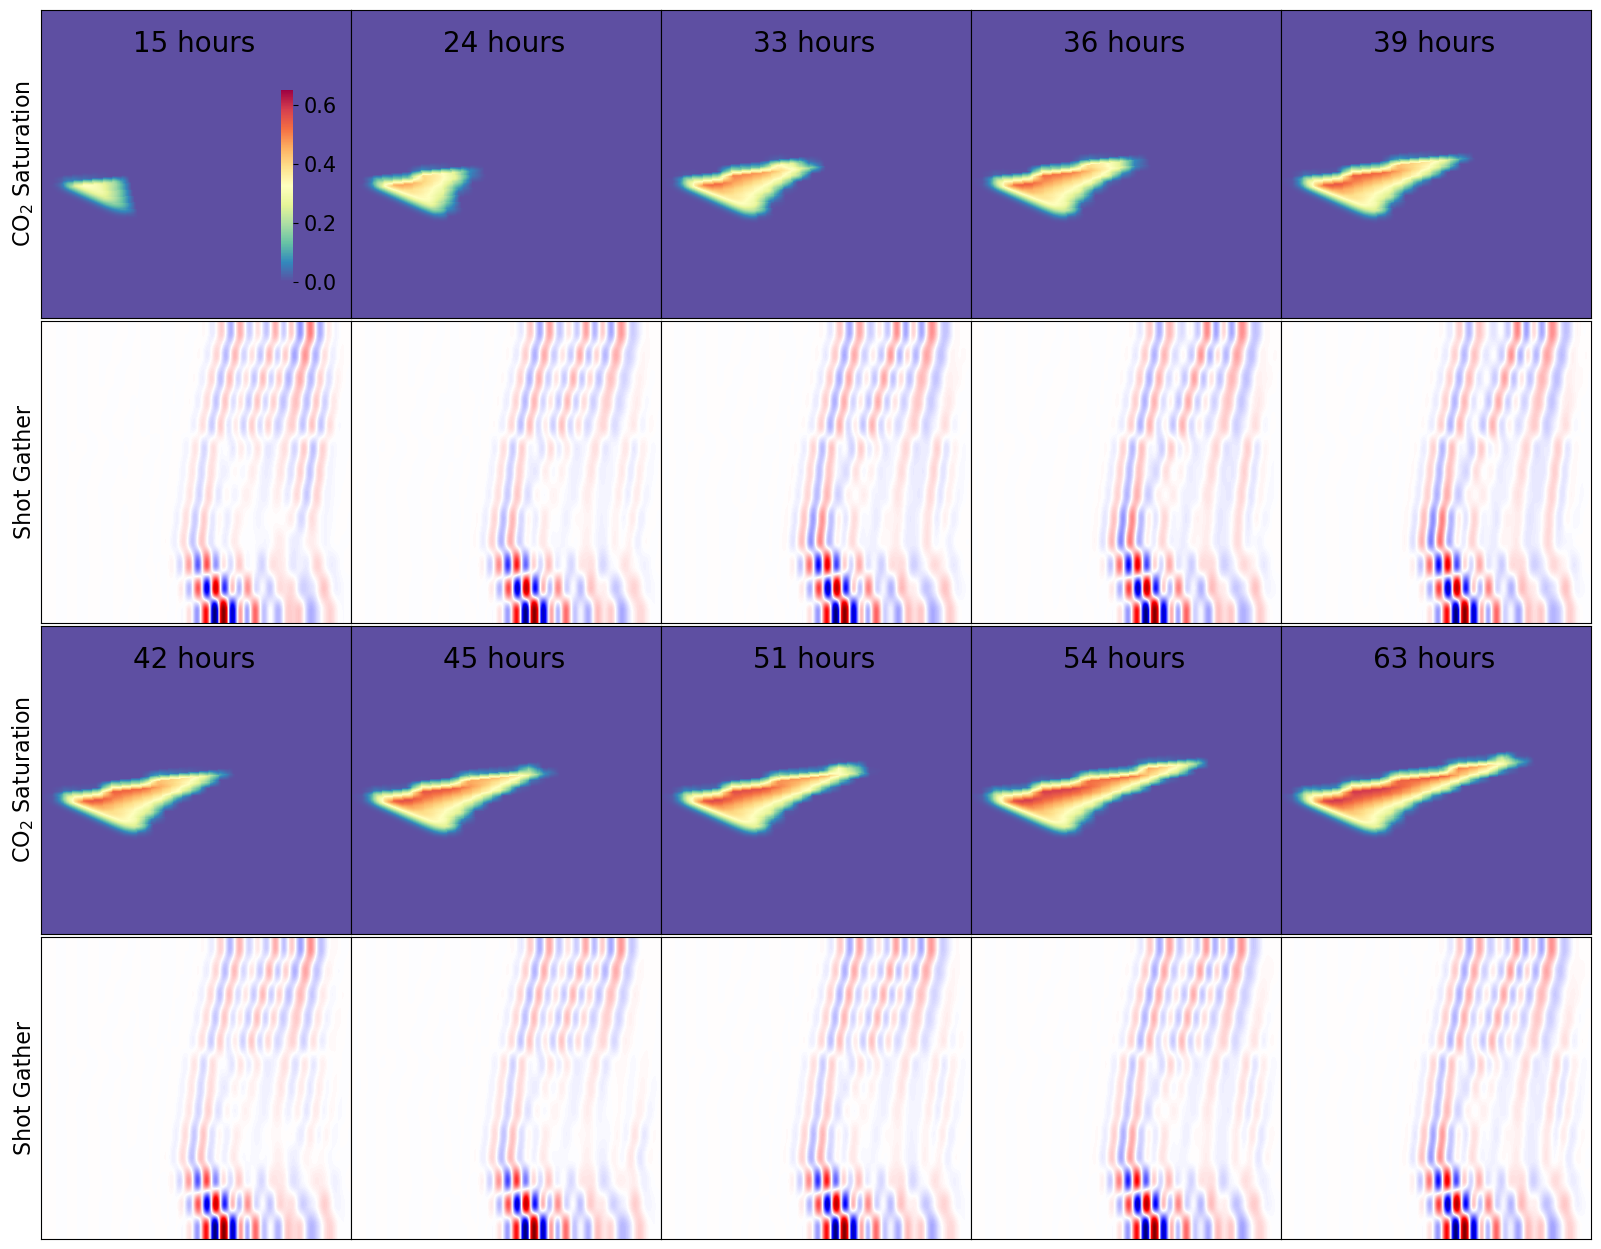

In [16]:
#crop from 76+7:383 on the vertical axis
n1 = 14
fig, axs = plt.subplots(4,5,figsize=(20,16))
# idx_2_select = [3,7,12,15,19]
# idx_2_select = sorted(np.random.choice(np.arange(20),size=10,replace=False))
idx_to_select = [3, 6, 9, 10, 11, 12, 13, 15, 16, 19]
frio2_co2ready_z = frio2_z[76+7:383]

clean_frio2_recz_round = sorted((np.rint(clean_frio2_recz)).astype(int),reverse=False)
for i in range(5):
    ax_top1 = axs[0,i]
    ax_bot1 = axs[1,i]
    ax_top2 = axs[2,i]
    ax_bot2 = axs[3,i]

    ## CO2 Saturations
    im0 = ax_top1.imshow(CO2_Maps[n1,idx_to_select[i]],cmap='Spectral_r',aspect='auto',vmin=0.0,vmax=0.65,
                         extent=(frio2_soux,frio2_recx,frio2_co2ready_z.max(),frio2_co2ready_z.min()))
    ax_top1.text(9,1640, '{} hours'.format(3*idx_to_select[i]+6),fontsize=20)
    ax_top1.get_xaxis().set_ticks([])
    ax_top1.get_yaxis().set_ticks([])
    if i == 0:
        cax = fig.add_axes([0.245, 0.71, 0.006, 0.12]) #left bottom width height
        cbar = fig.colorbar(im0,cax=cax,ax=axs[0,0],fraction=0.034)
        cbar.ax.tick_params(labelsize=15)
        # cbar.ax.set_xlabel('sat.',fontsize=15)
        # cbar.ax.xaxis.set_label_coords(1,1.12)
        cbar.outline.set_visible(False)

        ax_top1.set_ylabel('CO$_2$ Saturation',fontsize=16)
        ax_bot1.set_ylabel('Shot Gather',fontsize=16)
        ax_top2.set_ylabel('CO$_2$ Saturation',fontsize=16)
        ax_bot2.set_ylabel('Shot Gather',fontsize=16)

    ## seismic gathers
    seis_pick = Seismic_Gathers[n1,idx_to_select[i]]
    ax_bot1.imshow(seis_pick,cmap='seismic',vmin=-1,vmax=1,aspect=120)
    ax_bot1.get_xaxis().set_ticks([])
    ax_bot1.get_yaxis().set_ticks([])
    ax_bot1.invert_yaxis()

    ## CO2 Saturations
    ax_top2.imshow(CO2_Maps[n1,idx_to_select[i+4]],cmap='Spectral_r',aspect='auto',vmin=0.0,vmax=0.65,extent=(frio2_soux,frio2_recx,frio2_co2ready_z.max(),frio2_co2ready_z.min()))
    ax_top2.text(9,1640, '{} hours'.format(3*(idx_to_select[i+5])+6),fontsize=20)
    ax_top2.get_xaxis().set_ticks([])
    ax_top2.get_yaxis().set_ticks([])

    ## Seismic gathers
    seis_pick = Seismic_Gathers[n1,i+4]
    ax_bot2.imshow(seis_pick,cmap='seismic',vmin=-1,vmax=1,aspect=120)
    ax_bot2.get_xaxis().set_ticks([])
    ax_bot2.get_yaxis().set_ticks([])
    ax_bot2.invert_yaxis()

    
plt.subplots_adjust(wspace = 0,hspace=0.0)
